# Function Providers Showcase

This notebook demonstrates the **new simplified function provider architecture** from `function_providers.py`. The key improvement is that providers now only require a **space parameter** (which contains domain information), making the API cleaner and eliminating redundancy.

## Key Features Demonstrated:

### 🎯 **Simplified API**
- **Before**: `FourierFunctionProvider(domain, space)`
- **After**: `FourierFunctionProvider(space)` ← Domain comes from space!

### 🏗️ **Provider Hierarchy**
- `FunctionProvider` (base class)
- `IndexedFunctionProvider` (basis functions, ordered families)
- `ParametricFunctionProvider` (configurable functions)
- `RandomFunctionProvider` (stochastic functions)

### 🔧 **Concrete Implementations**
- `FourierFunctionProvider` - trigonometric basis functions
- `SplineFunctionProvider` - B-spline basis functions
- `DiscontinuousFunctionProvider` - random jump functions
- `WaveletFunctionProvider` - Haar wavelets

Let's explore each one!

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# Core imports
from pygeoinf.interval.interval_domain import IntervalDomain
from pygeoinf.interval.l2_space import L2Space
from pygeoinf.interval.function_providers import (
    FourierFunctionProvider,
    SplineFunctionProvider,
    DiscontinuousFunctionProvider,
    WaveletFunctionProvider,
    FunctionProviderAdapter
)

# Set up plotting style
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Function Providers Showcase Setup Complete!")
print("📦 Using the new simplified space-only API")

/disks/data/PhD/Inferences/pygeoinf/pygeoinf/random_matrix.py:6: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.2)
  from scipy.linalg import (


✅ Function Providers Showcase Setup Complete!
📦 Using the new simplified space-only API


## 1. Setting Up the Foundation: Space and Domain

The new API requires only a **space** - the domain information comes automatically from `space.function_domain`.

In [2]:
# Create domain and space
domain = IntervalDomain(0, 2*np.pi, name="Demo Domain")
space = L2Space(8, domain, basis_type='fourier')

print("=== Foundation Setup ===")
print(f"📐 Domain: {domain}")
print(f"📏 Domain length: {domain.length:.4f}")
print(f"🏠 Space: {space.dim}-dimensional L2Space")
print(f"🎯 Space domain: {space.function_domain}")
print(f"✅ Domain consistency: {domain == space.function_domain}")

print("\n💡 Key Insight: Space contains domain → No need to pass both!")

=== Foundation Setup ===
📐 Domain: [0.0, 6.283185307179586]
📏 Domain length: 6.2832
🏠 Space: 8-dimensional L2Space
🎯 Space domain: [0.0, 6.283185307179586]
✅ Domain consistency: True

💡 Key Insight: Space contains domain → No need to pass both!


## 2. Fourier Function Provider

Demonstrates the **IndexedFunctionProvider** interface with trigonometric functions.

=== Fourier Function Provider ===
🎵 Provider type: FourierFunctionProvider
📐 Domain from provider: [0.0, 6.283185307179586]
🏠 Space from provider: 8D

🎯 Generated Functions:
  📈 Index 0: fourier_const
  📈 Index 1: fourier_cos_1
  📈 Index 2: fourier_sin_1
  📈 Index 3: fourier_cos_2
  📈 Index 4: fourier_sin_2
  📈 Index 5: fourier_cos_3
  📈 Index 6: fourier_sin_3
  📈 Index 7: fourier_cos_4


/disks/data/PhD/Inferences/pygeoinf/pygeoinf/interval/l2_functions.py:263: UserWarning: Point evaluation is not well-defined for general L² functions. Consider using a Sobolev space with s > 1/2 for point evaluation.
  warnings.warn(


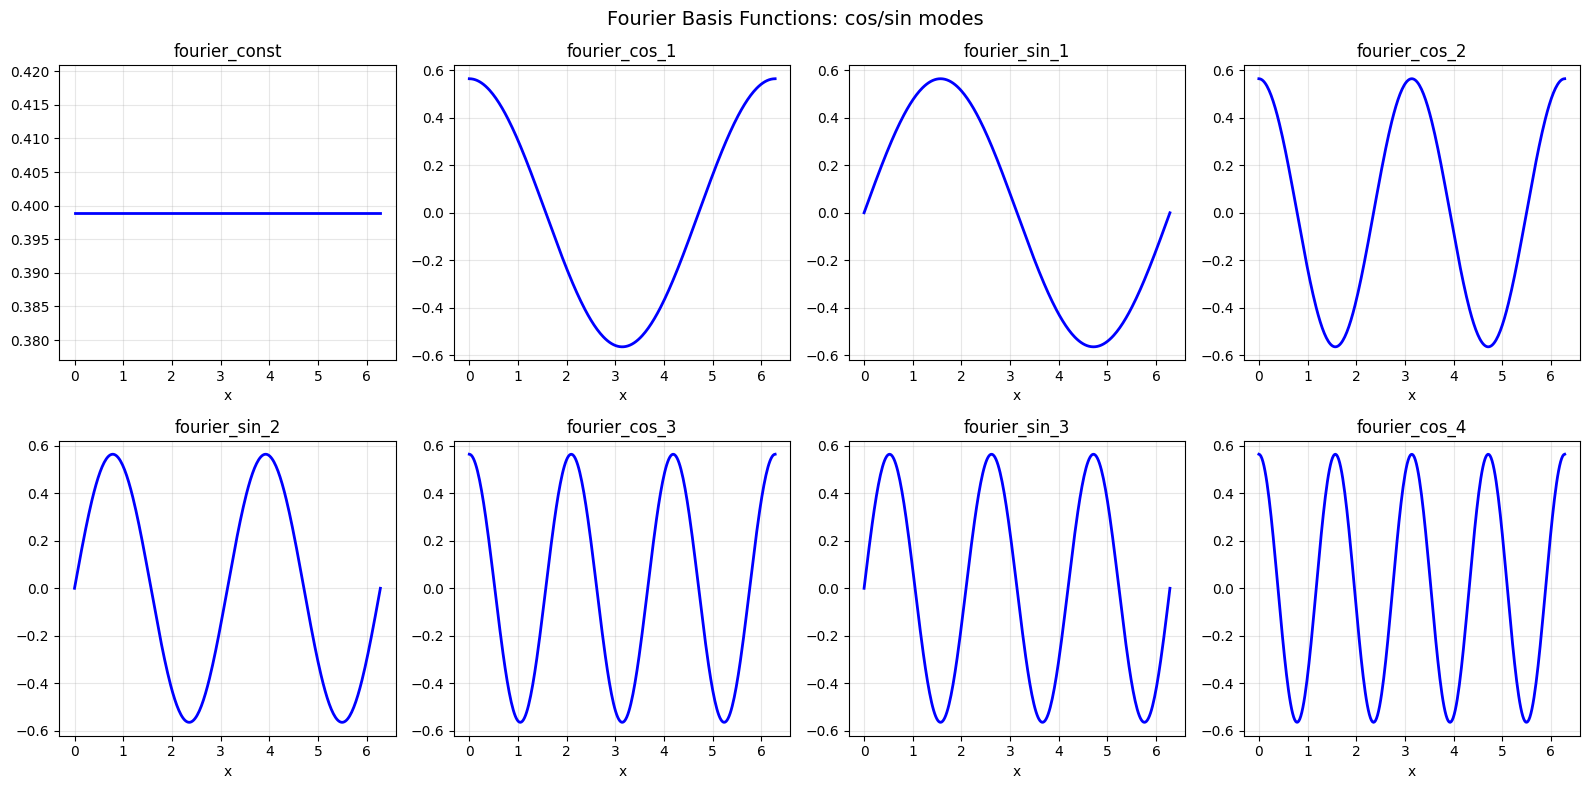


✅ Fourier provider demonstrates IndexedFunctionProvider interface
✅ Automatic domain access from space.function_domain


In [3]:
# Create Fourier provider with new simplified API
fourier_provider = FourierFunctionProvider(space)  # ← Only space needed!

print("=== Fourier Function Provider ===")
print(f"🎵 Provider type: {type(fourier_provider).__name__}")
print(f"📐 Domain from provider: {fourier_provider.domain}")
print(f"🏠 Space from provider: {fourier_provider.space.dim}D")

# Generate Fourier basis functions
x = np.linspace(0, 2*np.pi, 300)
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

print("\n🎯 Generated Functions:")
for i in range(8):
    func = fourier_provider.get_function_by_index(i)
    y = func.evaluate(x)

    axes[i].plot(x, y, 'b-', linewidth=2)
    axes[i].set_title(f'{func.name}')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xlabel('x')

    print(f"  📈 Index {i}: {func.name}")

plt.suptitle('Fourier Basis Functions: cos/sin modes', fontsize=14)
plt.tight_layout()
plt.show()

print("\n✅ Fourier provider demonstrates IndexedFunctionProvider interface")
print("✅ Automatic domain access from space.function_domain")

## 3. Spline Function Provider

Demonstrates both **IndexedFunctionProvider** and **ParametricFunctionProvider** interfaces.

=== Spline Function Provider ===
🎯 Provider type: SplineFunctionProvider
📐 Domain: [0.0, 6.283185307179586]
⚙️  Default parameters: {'degree': 3, 'knots': array([0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
       3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531]), 'coeffs': array([1., 1., 1., 1., 1., 1.])}

📊 Method 1: Indexed Basis Functions
  📈 B-spline 0: spline_0
  📈 B-spline 1: spline_1
  📈 B-spline 2: spline_2
  📈 B-spline 3: spline_3
  📈 B-spline 4: spline_4
  📈 B-spline 5: spline_5


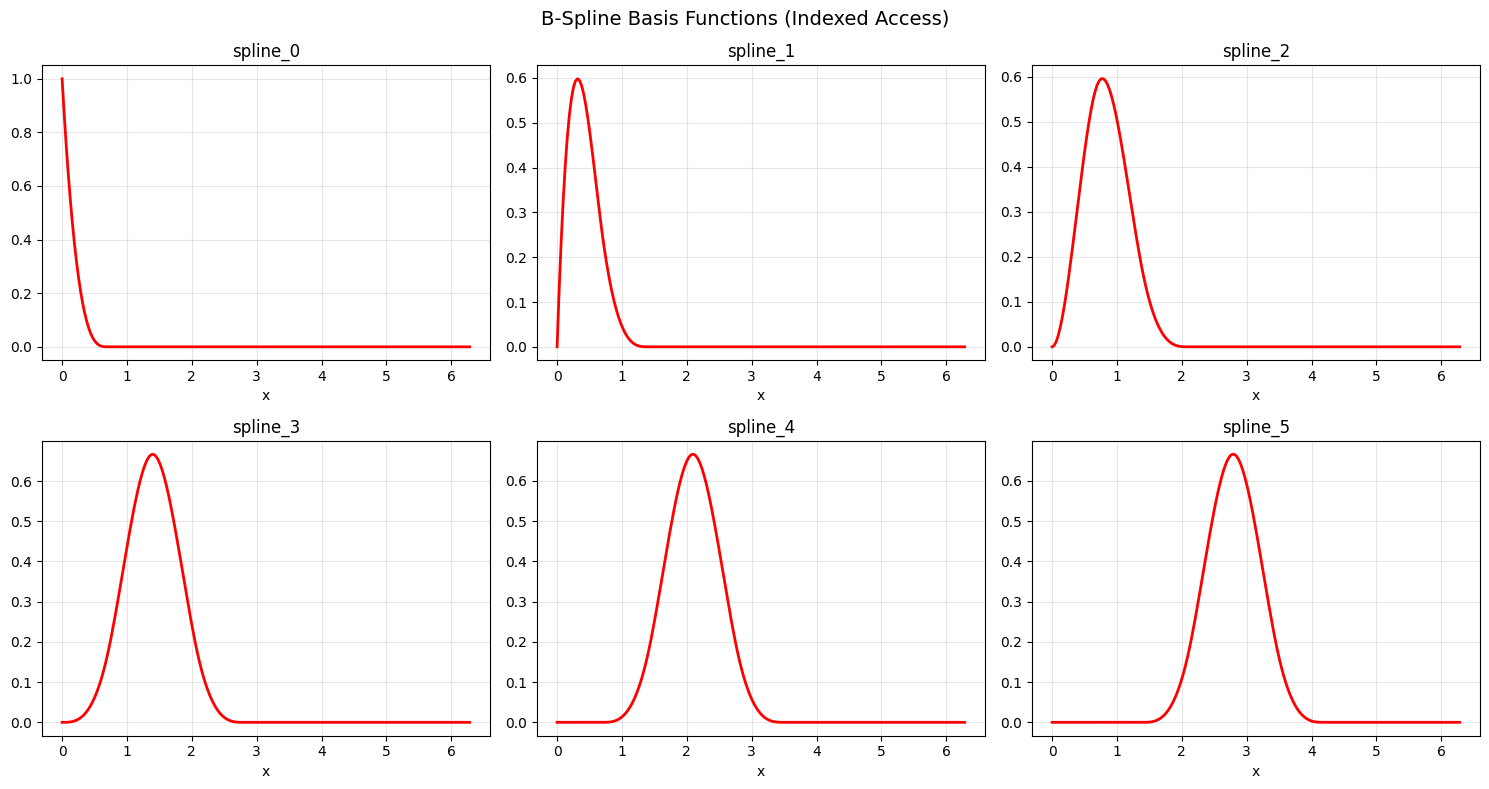


⚙️  Method 2: Parametric Custom Splines
  🎨 Custom spline 1: spline_deg2
  🎨 Custom spline 2: spline_deg3


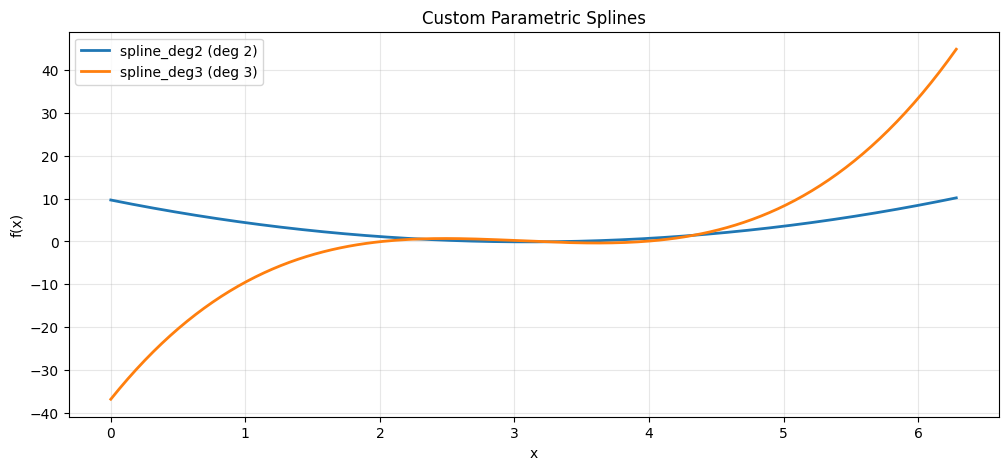


✅ Spline provider demonstrates dual interface: Indexed + Parametric


In [4]:
# Create spline provider
spline_provider = SplineFunctionProvider(space)

print("=== Spline Function Provider ===")
print(f"🎯 Provider type: {type(spline_provider).__name__}")
print(f"📐 Domain: {spline_provider.domain}")
print(f"⚙️  Default parameters: {spline_provider.get_default_parameters()}")

# Method 1: Indexed access (basis functions)
print("\n📊 Method 1: Indexed Basis Functions")
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
x = np.linspace(0, 2*np.pi, 200)

for i in range(6):
    row, col = i // 3, i % 3
    func = spline_provider.get_function_by_index(i, degree=3, n_knots=8)
    y = np.array([func.evaluate(xi) for xi in x])

    axes[row, col].plot(x, y, 'r-', linewidth=2)
    axes[row, col].set_title(f'{func.name}')
    axes[row, col].grid(True, alpha=0.3)
    axes[row, col].set_xlabel('x')

    print(f"  📈 B-spline {i}: {func.name}")

plt.suptitle('B-Spline Basis Functions (Indexed Access)', fontsize=14)
plt.tight_layout()
plt.show()

# Method 2: Parametric access (custom configurations)
print("\n⚙️  Method 2: Parametric Custom Splines")
spline_configs = [
    {
        'degree': 2,
        'knots': np.linspace(0, 2*np.pi, 6),
        'coeffs': [1, -0.5, 1.2, 0.8, -0.3]
    },
    {
        'degree': 3,
        'knots': np.linspace(0, 2*np.pi, 8),
        'coeffs': [0.5, 1, -1, 0.8, 1.2, -0.6, 0.9]
    }
]

plt.figure(figsize=(12, 5))
for i, params in enumerate(spline_configs):
    try:
        func = spline_provider.get_function_by_parameters(params)
        y = np.array([func.evaluate(xi) for xi in x])

        plt.plot(x, y, linewidth=2, label=f'{func.name} (deg {params["degree"]})')
        print(f"  🎨 Custom spline {i+1}: {func.name}")
    except Exception as e:
        print(f"  ❌ Config {i+1} failed: {e}")

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Custom Parametric Splines')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("\n✅ Spline provider demonstrates dual interface: Indexed + Parametric")

## 4. Discontinuous Function Provider

Demonstrates the **RandomFunctionProvider** interface for stochastic functions.

=== Discontinuous Function Provider ===
🎲 Provider type: DiscontinuousFunctionProvider
📐 Domain: [0.0, 6.283185307179586]
🌱 Random seed: 42 (reproducible)

🎯 Generated Random Functions:
  📈 Function 1: discontinuous_2 (n=2, range=(-1, 1))
  📈 Function 2: discontinuous_3 (n=3, range=(-0.5, 1.5))
  📈 Function 3: discontinuous_4 (n=4, range=(-2, 2))
  📈 Function 4: discontinuous_1 (n=1, range=(0.5, 1.5))
  📈 Function 5: discontinuous_5 (n=5, range=(-1, 1))
  📈 Function 6: discontinuous_3 (n=random, range=(-1.5, 1.5))


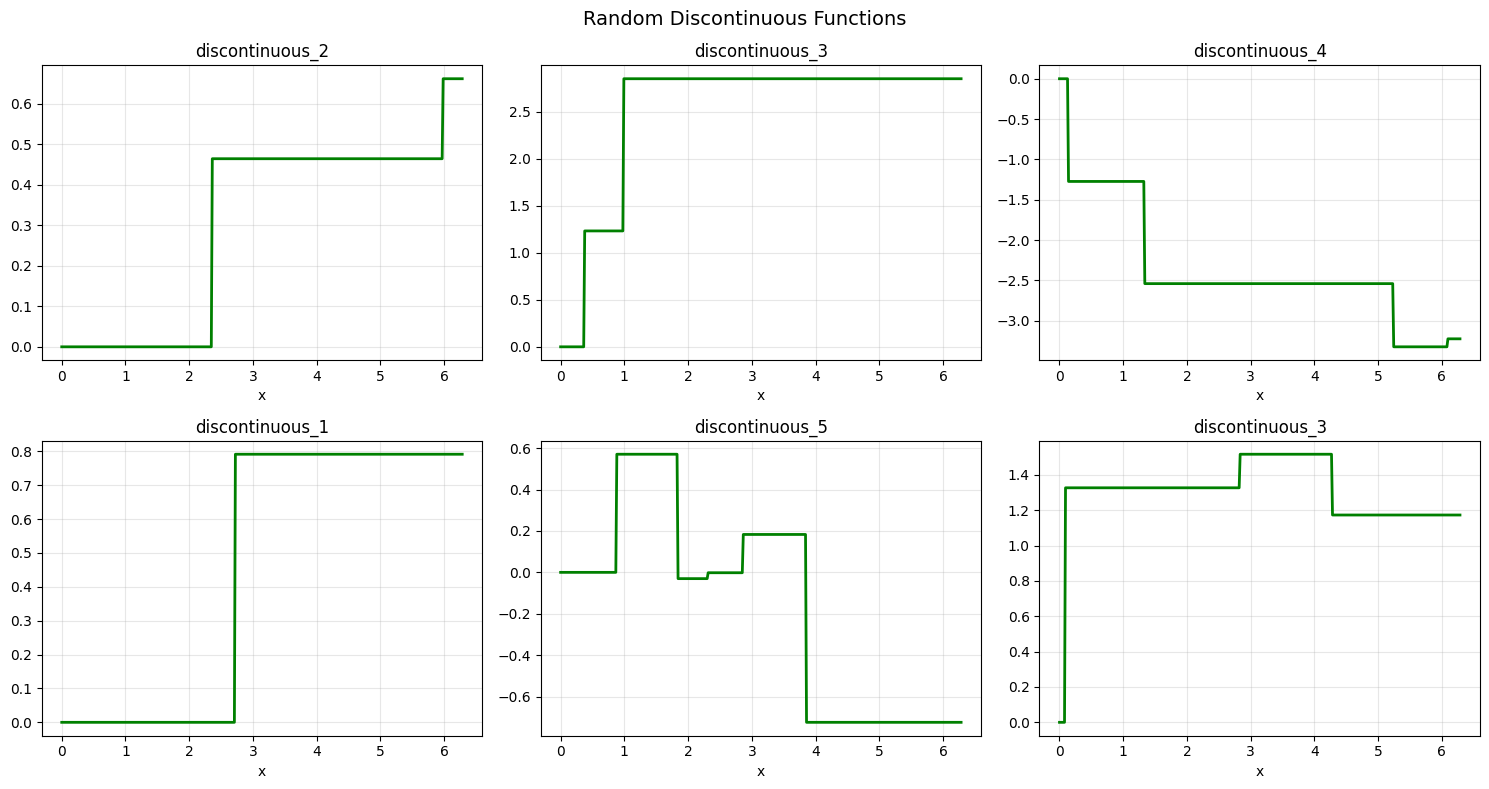


✅ Discontinuous provider demonstrates RandomFunctionProvider interface
✅ Configurable stochastic parameters with reproducible randomness


In [5]:
# Create discontinuous provider with reproducible randomness
discontinuous_provider = DiscontinuousFunctionProvider(space, random_state=42)

print("=== Discontinuous Function Provider ===")
print(f"🎲 Provider type: {type(discontinuous_provider).__name__}")
print(f"📐 Domain: {discontinuous_provider.domain}")
print(f"🌱 Random seed: 42 (reproducible)")

# Generate different random discontinuous functions
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()
x = np.linspace(0, 2*np.pi, 400)

print("\n🎯 Generated Random Functions:")
random_configs = [
    {'n_discontinuities': 2, 'jump_range': (-1, 1)},
    {'n_discontinuities': 3, 'jump_range': (-0.5, 1.5)},
    {'n_discontinuities': 4, 'jump_range': (-2, 2)},
    {'n_discontinuities': 1, 'jump_range': (0.5, 1.5)},
    {'n_discontinuities': 5, 'jump_range': (-1, 1)},
    {'n_discontinuities': None, 'jump_range': (-1.5, 1.5)}  # Random count
]

for i, config in enumerate(random_configs):
    func = discontinuous_provider.sample_function(**config)
    y = np.array([func.evaluate(xi) for xi in x])

    axes[i].plot(x, y, 'g-', linewidth=2)
    axes[i].set_title(f'{func.name}')
    axes[i].grid(True, alpha=0.3)
    axes[i].set_xlabel('x')

    n_disc = config['n_discontinuities'] or 'random'
    jump_range = config['jump_range']
    print(f"  📈 Function {i+1}: {func.name} (n={n_disc}, range={jump_range})")

plt.suptitle('Random Discontinuous Functions', fontsize=14)
plt.tight_layout()
plt.show()

print("\n✅ Discontinuous provider demonstrates RandomFunctionProvider interface")
print("✅ Configurable stochastic parameters with reproducible randomness")

## 5. Wavelet Function Provider

Demonstrates **IndexedFunctionProvider** with Haar wavelets.

=== Wavelet Function Provider ===
🌊 Provider type: WaveletFunctionProvider
📐 Domain: [0.0, 6.283185307179586]
🎭 Wavelet type: haar

🎯 Generated Haar Wavelets:
  📈 Wavelet 0: haar_scaling
  📈 Wavelet 1: haar_L1_I1
  📈 Wavelet 2: haar_L2_I2
  📈 Wavelet 3: haar_L2_I3
  📈 Wavelet 4: haar_L3_I4
  📈 Wavelet 5: haar_L3_I5
  📈 Wavelet 6: haar_L3_I6
  📈 Wavelet 7: haar_L3_I7


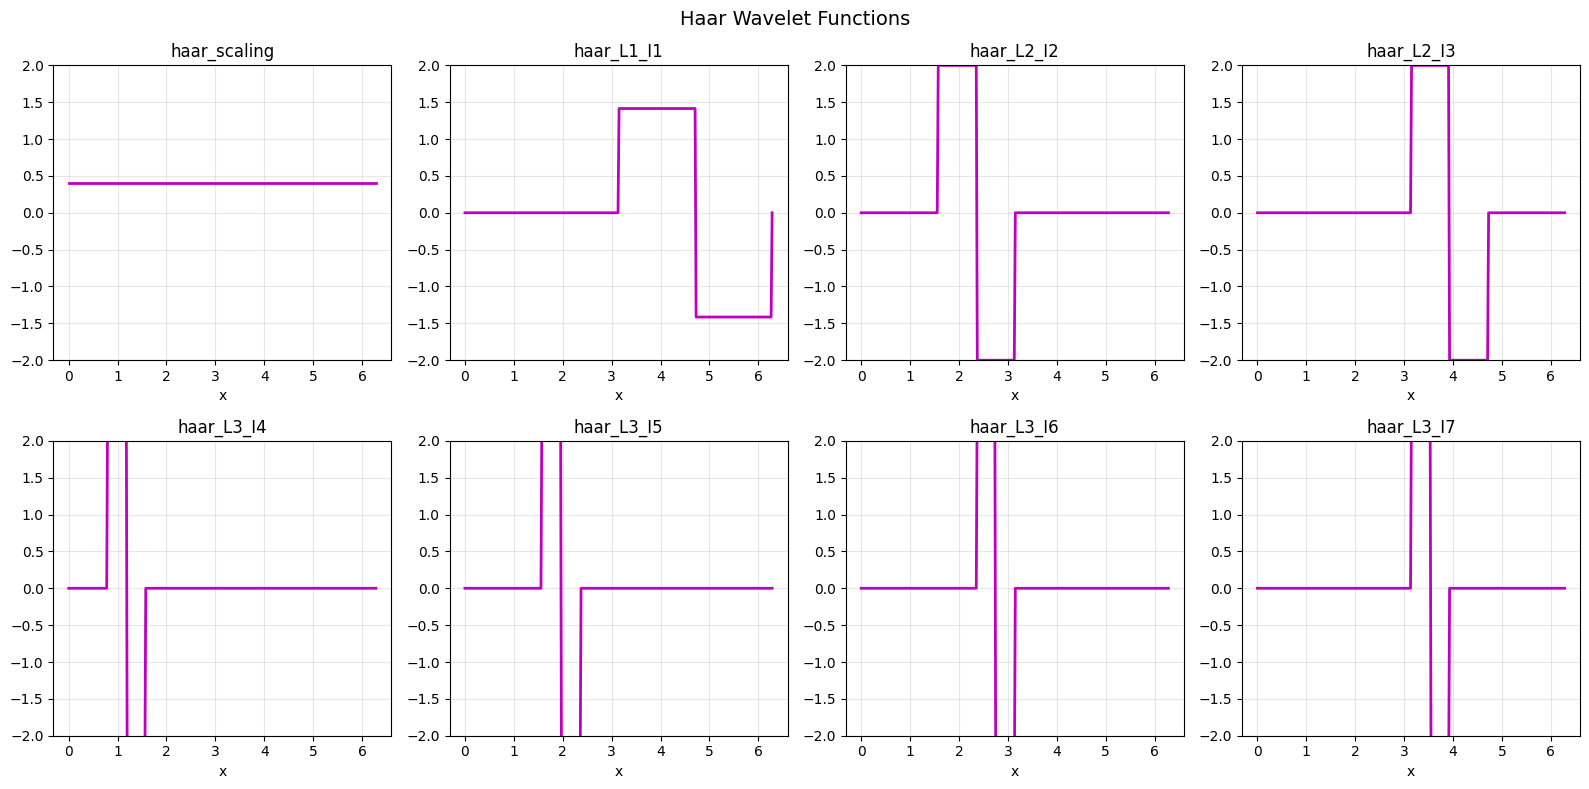


✅ Wavelet provider demonstrates IndexedFunctionProvider interface
✅ Hierarchical multi-scale function representation


In [6]:
# Create wavelet provider
wavelet_provider = WaveletFunctionProvider(space, wavelet_type='haar')

print("=== Wavelet Function Provider ===")
print(f"🌊 Provider type: {type(wavelet_provider).__name__}")
print(f"📐 Domain: {wavelet_provider.domain}")
print(f"🎭 Wavelet type: {wavelet_provider.wavelet_type}")

# Generate Haar wavelets
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()
x = np.linspace(0, 2*np.pi, 300)

print("\n🎯 Generated Haar Wavelets:")
for i in range(8):
    try:
        func = wavelet_provider.get_function_by_index(i)
        y = np.array([func.evaluate(xi) for xi in x])

        axes[i].plot(x, y, 'm-', linewidth=2)
        axes[i].set_title(f'{func.name}')
        axes[i].grid(True, alpha=0.3)
        axes[i].set_xlabel('x')
        axes[i].set_ylim(-2, 2)

        print(f"  📈 Wavelet {i}: {func.name}")
    except Exception as e:
        axes[i].text(0.5, 0.5, f'Error: {str(e)[:20]}...',
                    ha='center', va='center', transform=axes[i].transAxes)
        print(f"  ❌ Wavelet {i}: Error - {e}")

plt.suptitle('Haar Wavelet Functions', fontsize=14)
plt.tight_layout()
plt.show()

print("\n✅ Wavelet provider demonstrates IndexedFunctionProvider interface")
print("✅ Hierarchical multi-scale function representation")

## 6. Provider Comparison and Domain Consistency

Let's verify that all providers work consistently with the same space.

=== Provider Consistency Check ===
🔍 Domain Consistency:
  ✅ Fourier: [0.0, 6.283185307179586] (consistent: True)
  ✅ Spline: [0.0, 6.283185307179586] (consistent: True)
  ✅ Discontinuous: [0.0, 6.283185307179586] (consistent: True)
  ✅ Wavelet: [0.0, 6.283185307179586] (consistent: True)

🏠 Space Consistency:
  ✅ Fourier: 8D space (same object: True)
  ✅ Spline: 8D space (same object: True)
  ✅ Discontinuous: 8D space (same object: True)
  ✅ Wavelet: 8D space (same object: True)

📊 Sample Function Comparison:
  📈 Fourier cos(2x): fourier_cos_2
  📈 B-spline basis: spline_2
  📈 Random jumps: discontinuous_3
  📈 Haar wavelet: haar_L2_I2


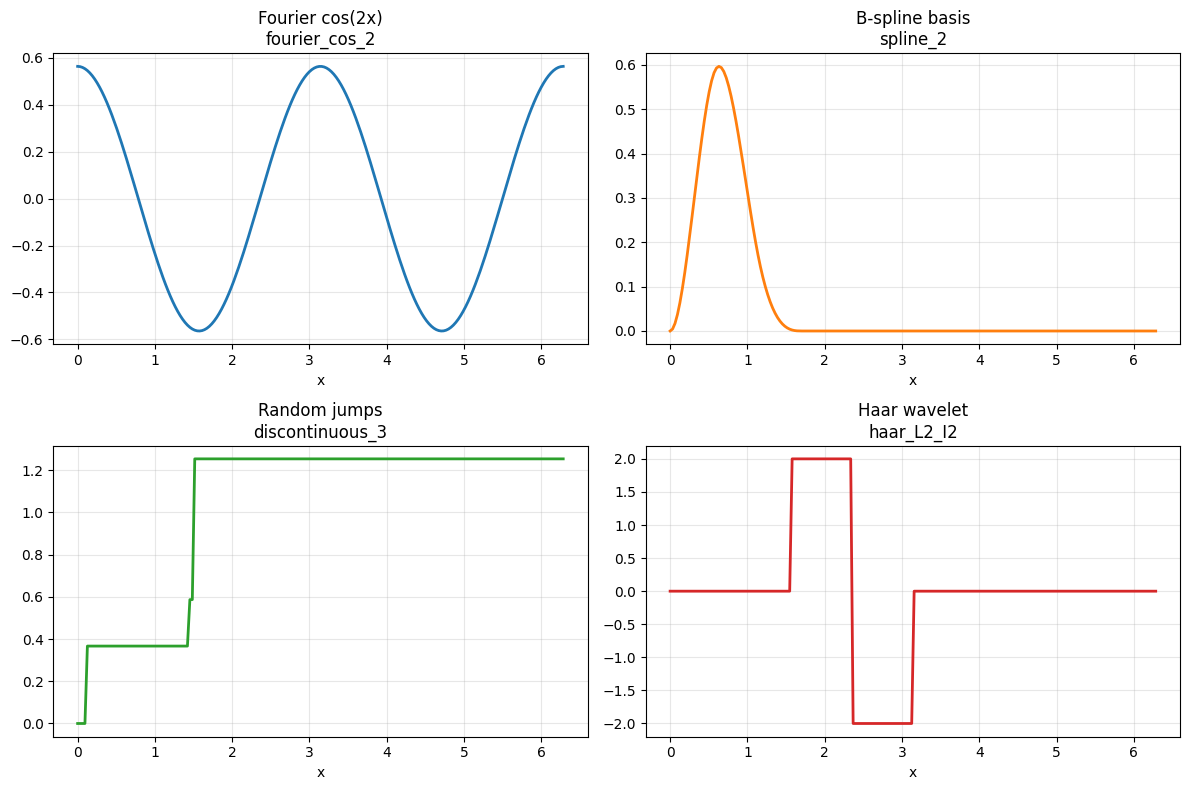


✅ All providers use the same space and domain consistently
✅ New API eliminates domain/space mismatch errors


In [7]:
print("=== Provider Consistency Check ===")

# Collect all providers
providers = {
    'Fourier': fourier_provider,
    'Spline': spline_provider,
    'Discontinuous': discontinuous_provider,
    'Wavelet': wavelet_provider
}

# Check domain consistency
print("🔍 Domain Consistency:")
reference_domain = space.function_domain
for name, provider in providers.items():
    provider_domain = provider.domain
    is_consistent = provider_domain == reference_domain
    status = "✅" if is_consistent else "❌"
    print(f"  {status} {name}: {provider_domain} (consistent: {is_consistent})")

# Check space consistency
print("\n🏠 Space Consistency:")
for name, provider in providers.items():
    provider_space = provider.space
    is_same_space = provider_space is space
    status = "✅" if is_same_space else "❌"
    print(f"  {status} {name}: {provider_space.dim}D space (same object: {is_same_space})")

# Compare sample functions from each provider
print("\n📊 Sample Function Comparison:")
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
x = np.linspace(0, 2*np.pi, 200)

sample_functions = [
    ('Fourier cos(2x)', fourier_provider.get_function_by_index(3)),
    ('B-spline basis', spline_provider.get_function_by_index(2)),
    ('Random jumps', discontinuous_provider.sample_function(n_discontinuities=3)),
    ('Haar wavelet', wavelet_provider.get_function_by_index(2))
]

for i, (title, func) in enumerate(sample_functions):
    row, col = i // 2, i % 2
    try:
        y = np.array([func.evaluate(xi) for xi in x])
        axes[row, col].plot(x, y, linewidth=2, color=f'C{i}')
        axes[row, col].set_title(f'{title}\n{func.name}')
        axes[row, col].grid(True, alpha=0.3)
        axes[row, col].set_xlabel('x')
        print(f"  📈 {title}: {func.name}")
    except Exception as e:
        axes[row, col].text(0.5, 0.5, f'Error: {str(e)[:30]}...',
                           ha='center', va='center', transform=axes[row, col].transAxes)
        print(f"  ❌ {title}: Error - {e}")

plt.tight_layout()
plt.show()

print("\n✅ All providers use the same space and domain consistently")
print("✅ New API eliminates domain/space mismatch errors")

## 7. Function Provider Adapter

Demonstrates how to bridge function providers with the existing basis/spectrum system.

=== Function Provider Adapter ===
🔗 Adapter type: FunctionProviderAdapter
📐 Adapter space: 8D
🎯 Wrapped provider: FourierFunctionProvider

🧪 Testing Adapter Interface:
  ✅ get_basis_function(2): fourier_sin_1
  ✅ Function evaluation: f(π) = 0.000000
  ✅ Caching works: True

📊 Adapter vs Direct Provider:


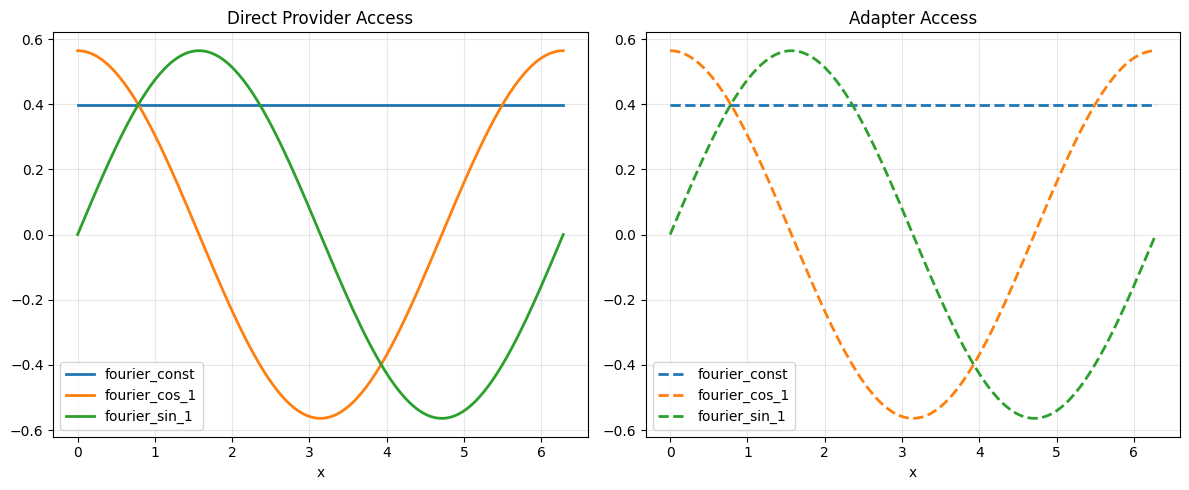


✅ Adapter provides bridge to existing basis/spectrum systems
✅ Maintains function provider flexibility with legacy compatibility


In [8]:
print("=== Function Provider Adapter ===")

# Create adapter to bridge function providers with basis system
fourier_adapter = FunctionProviderAdapter(fourier_provider)

print(f"🔗 Adapter type: {type(fourier_adapter).__name__}")
print(f"📐 Adapter space: {fourier_adapter.space.dim}D")
print(f"🎯 Wrapped provider: {type(fourier_adapter.function_provider).__name__}")

# Test adapter interface
print("\n🧪 Testing Adapter Interface:")
try:
    # Get basis function through adapter
    basis_func = fourier_adapter.get_basis_function(2)
    print(f"  ✅ get_basis_function(2): {basis_func.name}")

    # Test evaluation
    test_value = basis_func.evaluate(np.pi)
    print(f"  ✅ Function evaluation: f(π) = {test_value:.6f}")

    # Test caching
    cached_func = fourier_adapter.get_basis_function(2)  # Should be cached
    is_cached = cached_func is basis_func
    print(f"  ✅ Caching works: {is_cached}")

except Exception as e:
    print(f"  ❌ Adapter test failed: {e}")

# Compare adapter vs direct provider access
print("\n📊 Adapter vs Direct Provider:")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
x = np.linspace(0, 2*np.pi, 200)

for i in range(3):
    # Direct provider access
    direct_func = fourier_provider.get_function_by_index(i)
    y_direct = np.array([direct_func.evaluate(xi) for xi in x])
    ax1.plot(x, y_direct, linewidth=2, label=direct_func.name)

    # Adapter access
    adapter_func = fourier_adapter.get_basis_function(i)
    y_adapter = np.array([adapter_func.evaluate(xi) for xi in x])
    ax2.plot(x, y_adapter, linewidth=2, label=adapter_func.name, linestyle='--')

ax1.set_title('Direct Provider Access')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xlabel('x')

ax2.set_title('Adapter Access')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xlabel('x')

plt.tight_layout()
plt.show()

print("\n✅ Adapter provides bridge to existing basis/spectrum systems")
print("✅ Maintains function provider flexibility with legacy compatibility")

## 8. Advanced Usage: Multiple Providers with One Space

Demonstrate how multiple providers can share the same space efficiently.

=== Multiple Providers, One Space ===
🏠 Shared space: 12-dimensional L2Space
📐 Common domain: [0.0, 6.283185307179586]
🔧 Number of providers: 4

📚 Function Library:
  📖 Low-freq sine: fourier_sin_1 (space: 12D)
  📖 High-freq cosine: fourier_cos_4 (space: 12D)
  📖 Smooth spline: spline_3 (space: 12D)
  📖 Haar scaling: haar_scaling (space: 12D)
  📖 Haar detail: haar_L2_I3 (space: 12D)
  📖 Random jumps: discontinuous_4 (space: 12D)


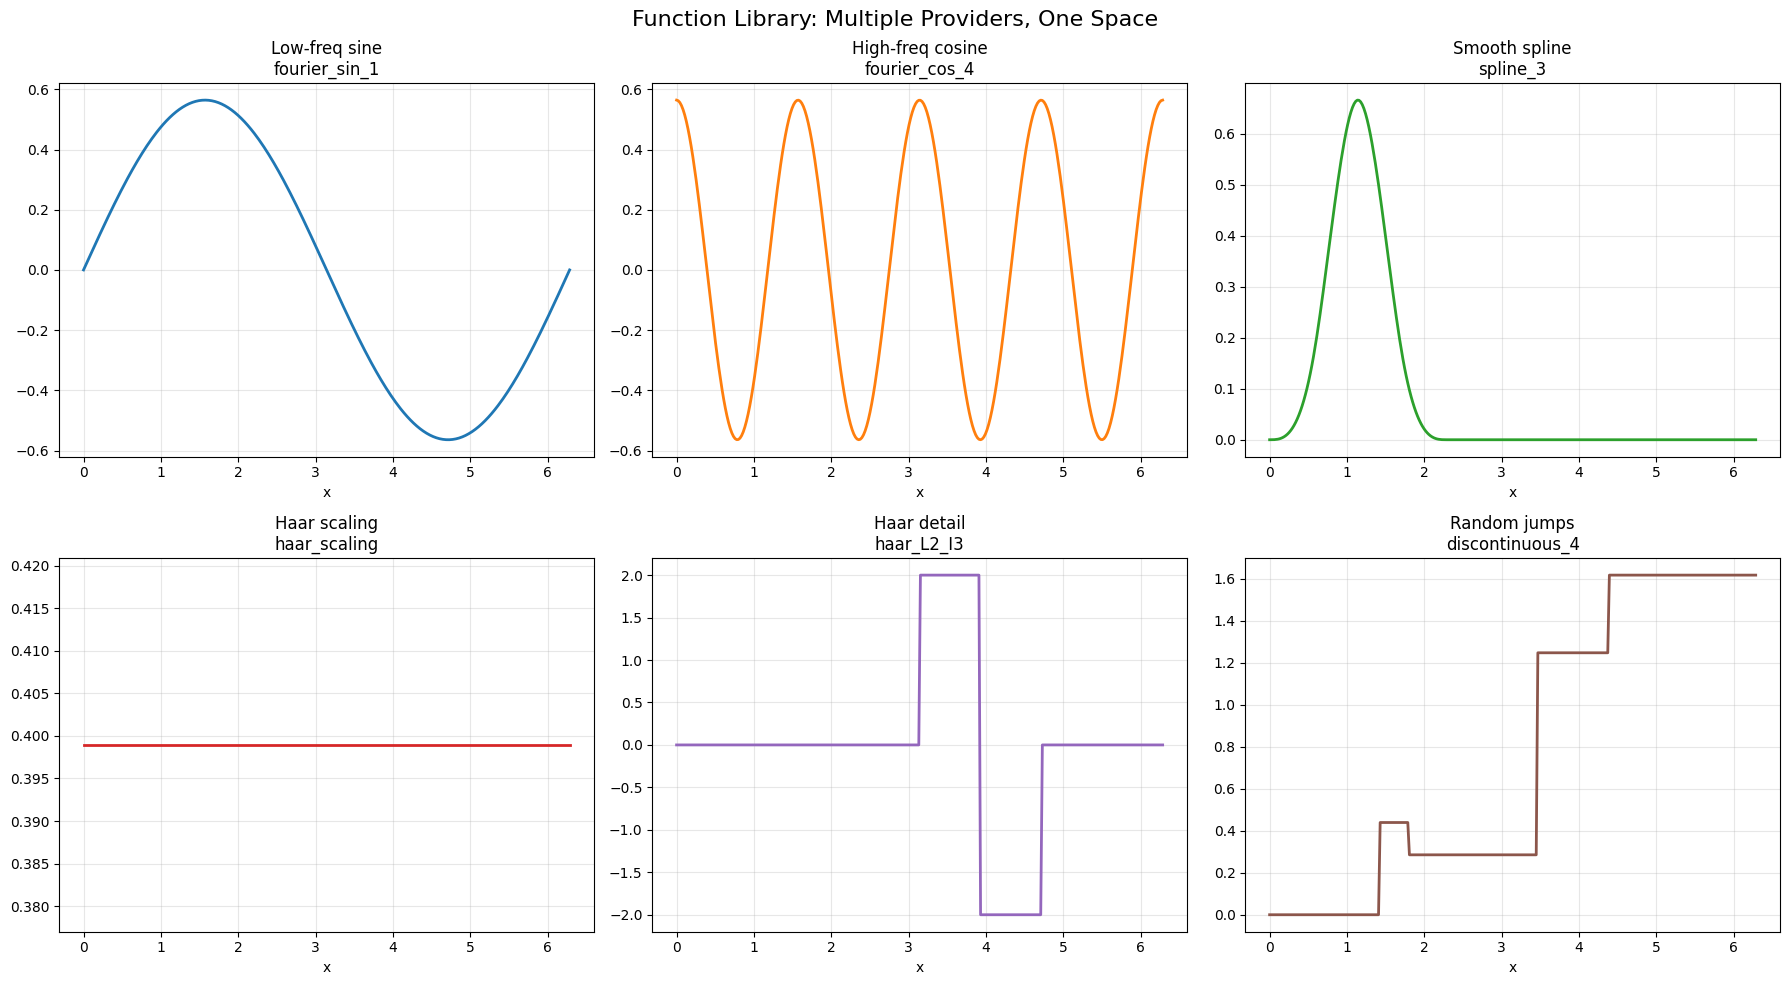


✅ Multiple providers can efficiently share the same space
✅ Each provider specializes in its mathematical family
✅ Consistent space ensures compatibility for all functions


In [9]:
print("=== Multiple Providers, One Space ===")

# Create a higher-dimensional space for more interesting functions
large_space = L2Space(12, domain, basis_type='fourier')

# Create multiple providers using the same space
multi_providers = {
    'fourier': FourierFunctionProvider(large_space),
    'spline': SplineFunctionProvider(large_space),
    'wavelet': WaveletFunctionProvider(large_space, wavelet_type='haar'),
    'discontinuous': DiscontinuousFunctionProvider(large_space, random_state=123)
}

print(f"🏠 Shared space: {large_space.dim}-dimensional L2Space")
print(f"📐 Common domain: {large_space.function_domain}")
print(f"🔧 Number of providers: {len(multi_providers)}")

# Create a function library with different types
function_library = {
    'Low-freq sine': multi_providers['fourier'].get_function_by_index(2),
    'High-freq cosine': multi_providers['fourier'].get_function_by_index(7),
    'Smooth spline': multi_providers['spline'].get_function_by_index(3),
    'Haar scaling': multi_providers['wavelet'].get_function_by_index(0),
    'Haar detail': multi_providers['wavelet'].get_function_by_index(3),
    'Random jumps': multi_providers['discontinuous'].sample_function(n_discontinuities=4)
}

print("\n📚 Function Library:")
for name, func in function_library.items():
    print(f"  📖 {name}: {func.name} (space: {func.space.dim}D)")

# Visualize the function library
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
x = np.linspace(0, 2*np.pi, 300)

for i, (name, func) in enumerate(function_library.items()):
    try:
        y = np.array([func.evaluate(xi) for xi in x])
        axes[i].plot(x, y, linewidth=2, color=f'C{i}')
        axes[i].set_title(f'{name}\n{func.name}')
        axes[i].grid(True, alpha=0.3)
        axes[i].set_xlabel('x')
    except Exception as e:
        axes[i].text(0.5, 0.5, f'Error: {str(e)[:30]}...',
                    ha='center', va='center', transform=axes[i].transAxes)

plt.suptitle('Function Library: Multiple Providers, One Space', fontsize=16)
plt.tight_layout()
plt.show()

print("\n✅ Multiple providers can efficiently share the same space")
print("✅ Each provider specializes in its mathematical family")
print("✅ Consistent space ensures compatibility for all functions")